# **Milestone 1**

## Context

The demand for used cars is growing in India.  While new car sales are slowing down, the demand for used cards is increasing.  This is the market that Cars4U aims to profit from.  Unfortunately, setting a price for used cars is much more complicated than that for new cars.  Many factors, such as milage, brand, model, year and more can influence the cars price.    

### Objective:

Come up with a pricing model that can be used to predict the price of used cars.  Cars4U can use this to set up effective strategies in order to gain a real foothold in this competitive market.

### Key questions

* Which factors most influence the price of a used car?
* How do these factors effect the price?

## **Our data**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM.

**Fuel_Type** : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car. (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC.

**Power** : The maximum power of the engine in bhp.

**Seats** : The number of seats in the car.

**New_price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### Time to check things out of the Library

In [1]:
# Import needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Let pandas show all columns and more rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# String manipulation
import regex as re

### Load the data into a Dataframe

In [2]:
# Read the data into a dataframe
df = pd.read_csv('used_cars.csv')

### Examine the first few rows

In [3]:
# This will display the top 5 rows, giving us a feel for the data
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


### Observations:

* S.No. looks like a unique identifier for each car.  We'll probably drop that column.
* The Name column contains both the make and model of the car.  It would be helpful to seperate this into two columns.
* The New_price column has NaNs.

### Explore the data a little deeper

In [4]:
# The info method gives us the number of non-null rows for each column along with their data-type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [5]:
# Check for missing values
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

### Observations:

* There are 7,253 rows.
* Name, Location, Fuel_Type, Transmission, and Owner_Type are objects, the rest are numbers.
* The first 8 columns have no missing values.
* Milage, Engine, Power, and Seats have only a few missing values.  We may be able to impute them from like entries or averaging.
* Only about 13% of rows have entries for New_price.  We will probably just have to drop that column.
* There are 1,234 rows missing an entry for our target variable.  We may not be able to use those rows either.


## Exploratory Data Analysis

In [6]:
# The describe method will give us some summary infomation on our data
df.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,2093.905084,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,7252.000000,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


### Observations:

* The oldest vehicles were built in 1996 and the newest in 2019.  Most are on the newer end of that spectrum.
* The highest milage is 6.5 million kilometers.  I think this must be a mistake.  We may need to address this.
* The mean milage is 58.7 thousand kilometers.  This figure is reasonable.
* There is at least one zero value in km/litre.  This must be an error.
* The values for Engine range form 34 to 616.
* We have a 10 seater in the lot!  The average is 5 seats.
* For our target variable Price, the lowest value is 44,000 rupees and the highest is 16 million!  The average is 948,000 rupees.

In [7]:
# We can use the describe method for categorical variables too.
df.describe(include = 'object')

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


### Observations

* There are 2041 unique Names.  I'm hoping to seperate this column into Make and Model.

* There are 11 unique locations, 5 fuel types, 2 transmission types and 4 owner types.

## Feature Engineering

### S.No

In [8]:
# Let's drop the S.No. column as it is just a unique identifier of each row and won't add value to our analysis
df.drop('S.No.', axis = 1, inplace = True)

### Kilometers_Driven

In [9]:
# Let's find any outliers with regards to Kilometers_Driven
high_milage = df[df['Kilometers_Driven'] > 730000]
high_milage

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.0,5.0,NaN,7.5
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,NaN,65.0


Thankfully there is only one row with an extreme value.  I'll either drop it or try and impute a value.

In [10]:
# I'll find the mean value for Kilometers_Driven for cars with only one owner
df[df['Owner_Type'] == 'First']['Kilometers_Driven'].mean()

55255.363911290326

In [11]:
# Here I'll replace the extreme value with the mean for cars with one owner
df.at[2328, 'Kilometers_Driven'] = 55255

### Mileage

In [12]:
# I don't like the name of the Milage column.  It's too easy to confuse with the Kilometers_Driven. Lets change it to km/litre.  
df.rename(columns={'Mileage':'km/litre'}, inplace = True)

In [13]:
# Convert zeroes to nulls and find out how many there are
df['km/litre'][df['km/litre'] == 0] = None
df['km/litre'].isnull().sum()

83

There is quite a few rows with this incorrect value.  I'd hate to drop all of them.  Let's use the median value to fill these in.

In [14]:
# Fill NaNs with the median value for the column
df['km/litre'].fillna(df['km/litre'].median(), inplace = True)

### Seats

In [15]:
# How many values are missing for the Seats feature
df.Seats.isnull().sum()

53

Presumably, there are the same number of seats in like car models.

In [16]:
# Find rows where the Seats value is missing
missing_seats = df[df['Seats'].isna()]
missing_seats = list(missing_seats.Name.unique())
seat_dict = {}
for row in missing_seats:
    seat_dict.update({row:df.Seats[df.Name == row].mean()})
                     
seat_dict

{'Honda City 1.5 GXI': 5.0,
 'Maruti Swift 1.3 VXi': nan,
 'Ford Figo Diesel': nan,
 'Land Rover Range Rover 3.0 D': nan,
 'Honda City 1.3 DX': nan,
 'Maruti Swift 1.3 ZXI': nan,
 'Land Rover Range Rover Sport 2005 2012 Sport': nan,
 'Honda City 1.5 EXI': 5.0,
 'Maruti Swift 1.3 LXI': nan,
 'Hyundai Santro LP zipPlus': nan,
 'Toyota Etios Liva V': 5.0,
 'Maruti Swift 1.3 VXI ABS': nan,
 'Maruti Estilo LXI': nan,
 'BMW 5 Series 520d Sedan': nan,
 'Hyundai Santro GLS II - Euro II': nan,
 'Maruti Wagon R Vx': nan,
 'Ford Endeavour Hurricane LE': nan,
 'Honda CR-V AT With Sun Roof': nan,
 'Fiat Punto 1.3 Emotion': nan,
 'Hyundai Santro Xing XG': nan,
 'Honda Jazz Select Edition': 5.0,
 'Fiat Punto 1.2 Dynamic': nan,
 'Fiat Punto 1.4 Emotion': nan,
 'Skoda Laura 1.8 TSI Ambition': nan,
 'Toyota Etios Liva Diesel TRD Sportivo': nan,
 'Hyundai i20 new Sportz AT 1.4': nan,
 'Mahindra TUV 300 P4': nan,
 'Honda Jazz 2020 Petrol': nan}

Unfortunately, this didn't help much.  We found seat values for 4 different models but not for the rest.  Still, we'll update those rows, then drop the rest.

In [17]:
# Replace missing values with values we imputed above
df.Seats[df.Name == 'Honda City 1.5 GXI'] = 5.0
df.Seats[df.Name == 'Honda City 1.5 EXI'] = 5.0
df.Seats[df.Name == 'Toyota Etios Liva V'] = 5.0
df.Seats[df.Name == 'Honda Jazz Select Edition'] = 5.0                                                                                        

In [18]:
# Drop the rest of the rows with missing seat values
df.drop(labels = df[df.Seats.isnull()].index.values, axis = 0, inplace = True)

### Engine

In [19]:
# Find missing values for Engine
df.Engine.isnull().sum()

6

Apparently, getting rid of those missing Seat rows took care of most of the missing Engine rows too.  I'm feeling better about having dropped those rows.  I'm going to drop these 6 rows too.

In [20]:
# Drop the 6 remaining rows that have no entries for Engine
df.drop(labels = df[df.Engine.isnull()].index.values, axis = 0, inplace = True)

### Power

In [21]:
# Let's find out how many values are missing for Power
df.Power.isnull().sum()

125

There is still a number of missing values for Power.  Let's figure out what to do.

<AxesSubplot:>

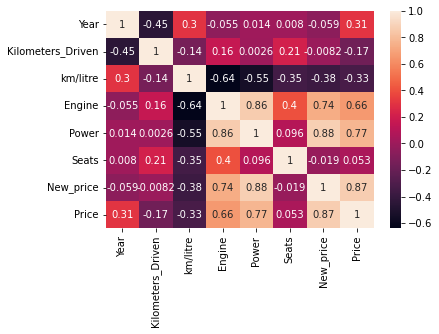

In [22]:
# Check correlation between Engine and Power
sns.heatmap(df.corr(), annot = True)

As expected, Engine and Power are very strongly correlated.  Let me see if I can use this to help fill in the missing values.  It'll be better than just using the mean.

In [23]:
# A rough calculation of how Engine and Power are related
(df.Engine/df.Power).mean()

15.148929650812065

In [24]:
# Replace missing values by dividing the Engine value by the above
df['Power'].fillna(df['Engine']/15.15, inplace = True)

### New_price

There are just too many missing values here.  I'm going to drop this column.

In [25]:
# Drop the New_Price column
df.drop('New_price', axis = 1, inplace = True)

### Price

In [26]:
# Check the number of remaining rows where Price is missing
df.Price.isnull().sum()

1223

This is quite unfortunate.  I don't feel comfortable trying to impute values for these rows.  That's essentially what this whole dataset is supposed to help us ultimately do via regression.  I'll drop these rows too :/

In [27]:
# Drop rows with missing Price values
df.drop(labels = df[df.Price.isnull()].index.values, axis = 0, inplace = True)

Let's see if we got all the nulls.

In [28]:
# Check if any null values remain
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
km/litre             0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Excellent!!!  We have gotten rid of all the null values.  

### Name

Lastly, I'd like to try and extract the make and model from the name column.  This would be simple if all the Makes were one word long.  Unfortunately, there is at least one that is two words, Land Rover.  I'll try and get around this for Land Rover.  If there are other Makes that consist of more than one word, I won't be able to deal with them since I'm not familiar with many of these Makes.  I would normally try to get the needed info from whoever collected the data.  

In [29]:
# Replace Land Rover with LandRover
df.replace('^Land Rover', 'LandRover', regex = True, inplace = True)

In [30]:
# Seperate the first word from the rest of the string
df[['Make', 'Model']] = df['Name'].str.split(' ', n=1, expand=True)

In [31]:
# Drop the now obsolete name column
df.drop('Name', axis = 1, inplace = True)

If I were to find out about other Makes in the future that need special treatment, it would be easy enough to repeat the proceeding on them.



At last our data is cleaned and ready to work with.  We lost about 1,300 rows but we still have almost 6,000 rows.

## Univariate Analysis - Numerical

Let's build histograms and boxplots for the numerical variables.

In [32]:
# Function to assist us with histograms and boxplots
def hist_n_box(feature, figsize = (18, 12), bins = None):
    print('Skew: ', feature.skew())
    f2, (ax_box, ax_hist) = plt.subplots(nrows = 2,
                                           sharex = True,
                                           gridspec_kw = {"height_ratios": (.30, .70)}, 
                                           figsize = figsize)
    sns.boxplot(feature, ax = ax_box, showmeans = True)
    sns.distplot(feature, ax = ax_hist, kde = False, bins = bins)

### Kilometers_Driven

Skew:  4.220985288267778


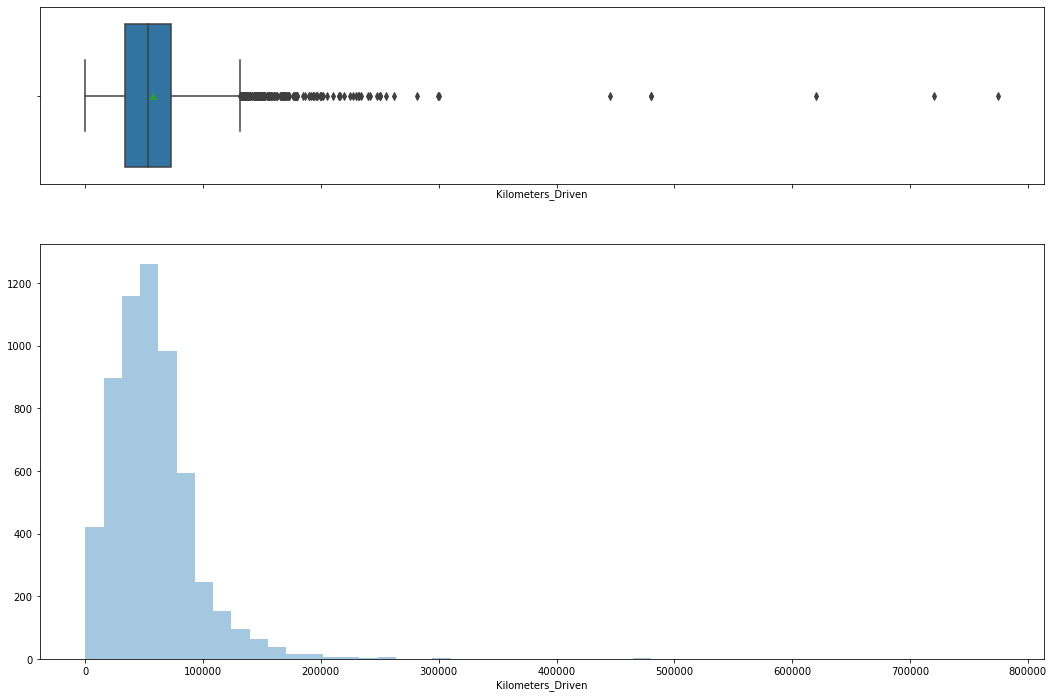

In [33]:
# Call hist_n_box for Kilometers_Driven
hist_n_box(df['Kilometers_Driven'])

The Kilometers_Driven variable is highly right skewed. This is a problem as it violates one of our assumptions for linear regression, namely that the data be normally distributed.  We can try transforming this feature in various ways to see if that helps fix the problem.

Skew:  -1.3568201186494075


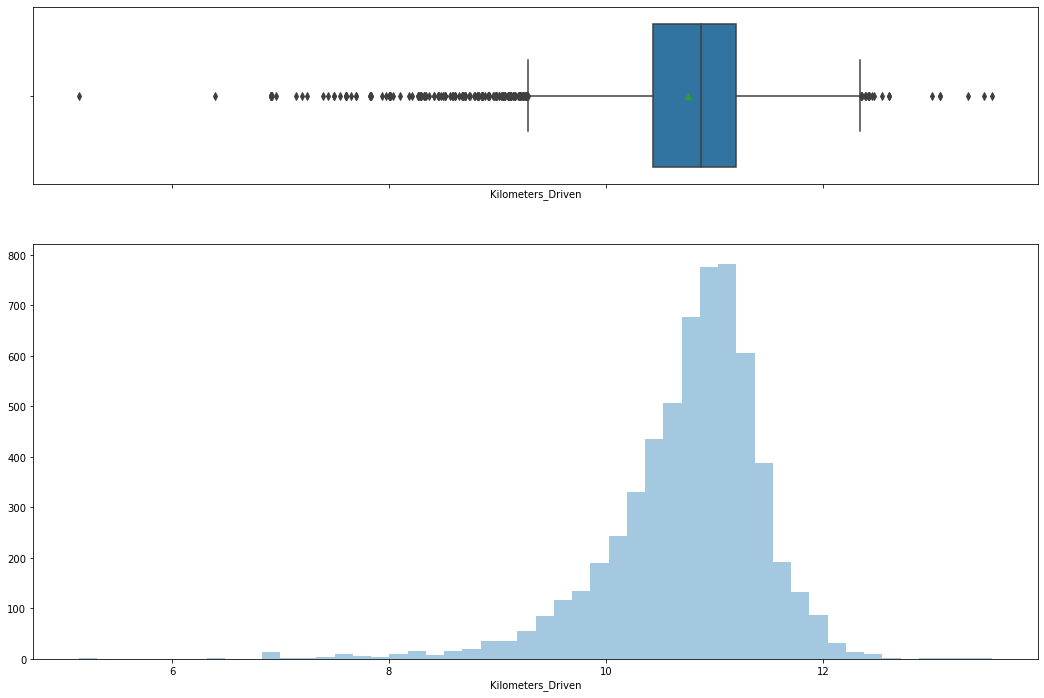

In [34]:
# Let's try a log transformation first
hist_n_box(np.log(df['Kilometers_Driven']))

Skew:  0.6071129185710393


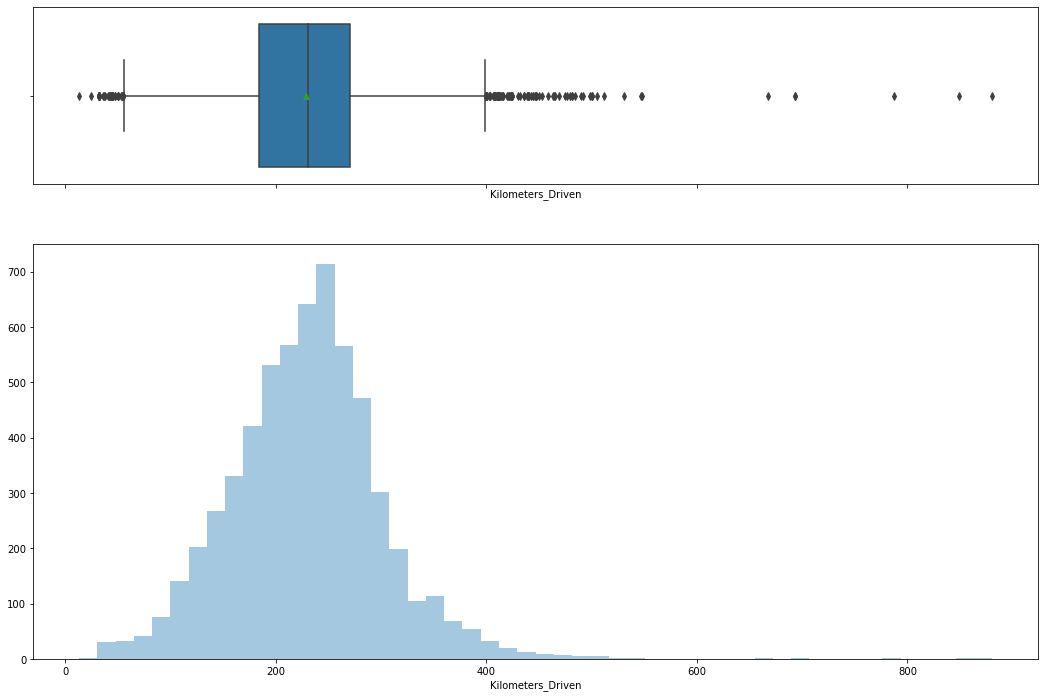

In [35]:
# Now a square root transform
hist_n_box(np.sqrt(df['Kilometers_Driven']))

Skew:  0.12082304835793534


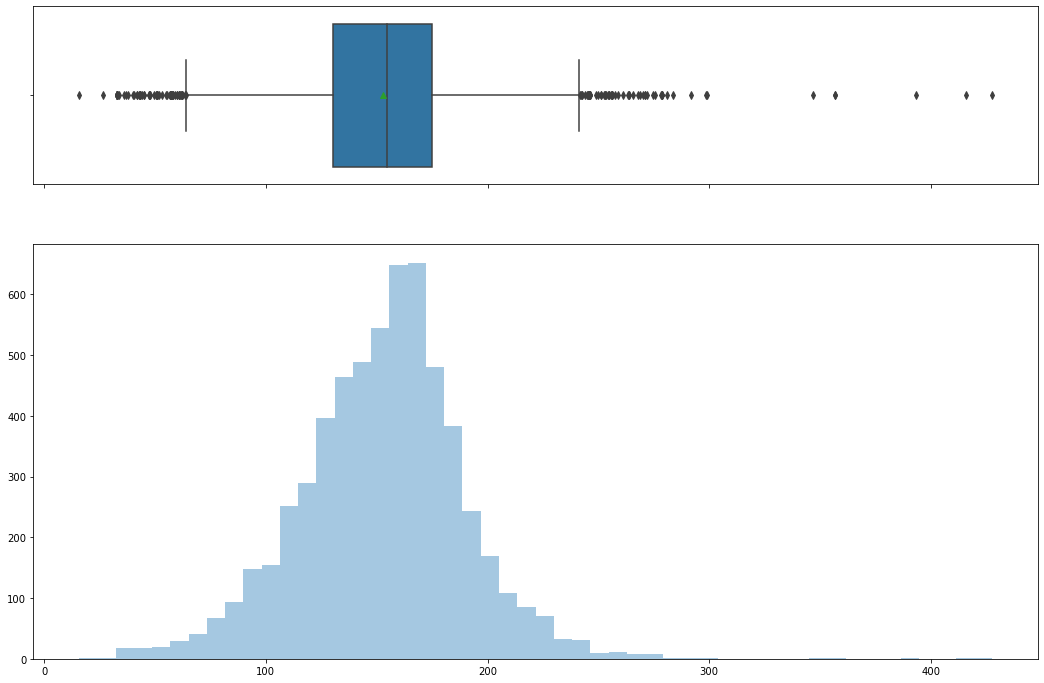

In [36]:
# Lastly, there is something called Box-Cox transformation that I read about.  Our data is positive, so let's give it a whirl.
from scipy import stats
hist_n_box(pd.Series(stats.boxcox(df['Kilometers_Driven'])[0]))

The box-cox transformation gave the best result, so let's use that.

In [37]:
# We'll add the box-cox transformed column to the data.  I'll make a note of lambda for later.
df['Kilometers_Driven_boxcox'] = stats.boxcox(df['Kilometers_Driven'])[0]

### Price

Skew:  3.335019605478295


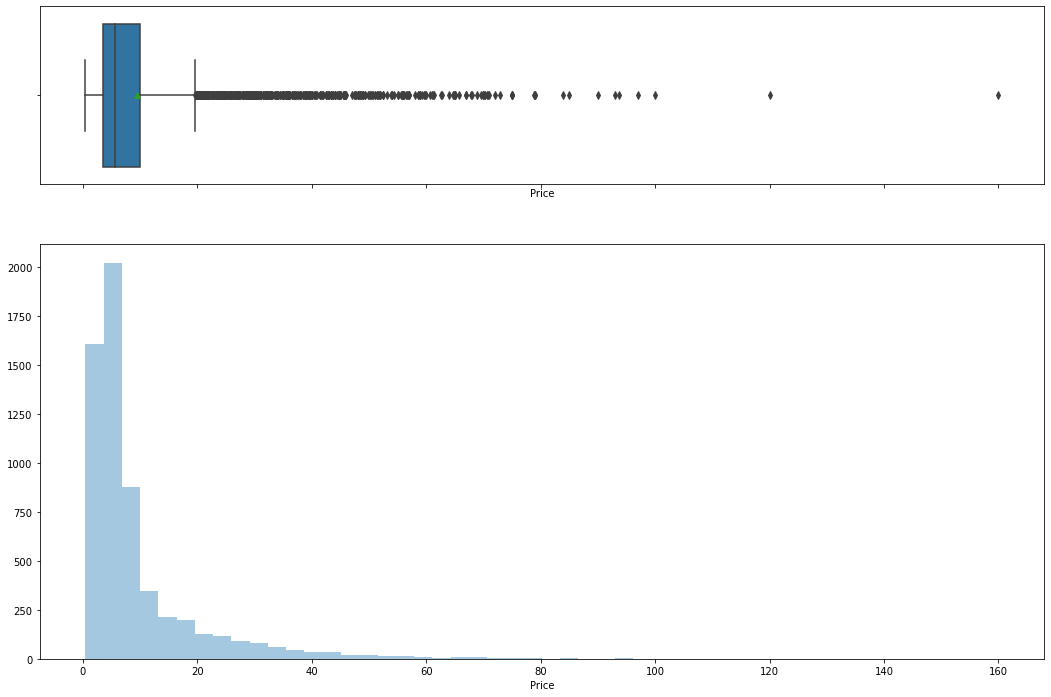

In [38]:
# Call hist_n_box for Price
hist_n_box(df.Price)

Price too is highly right, skewed.  We'll go through the same process that we did for Kilometers_Driven.

Skew:  0.4193154879073026


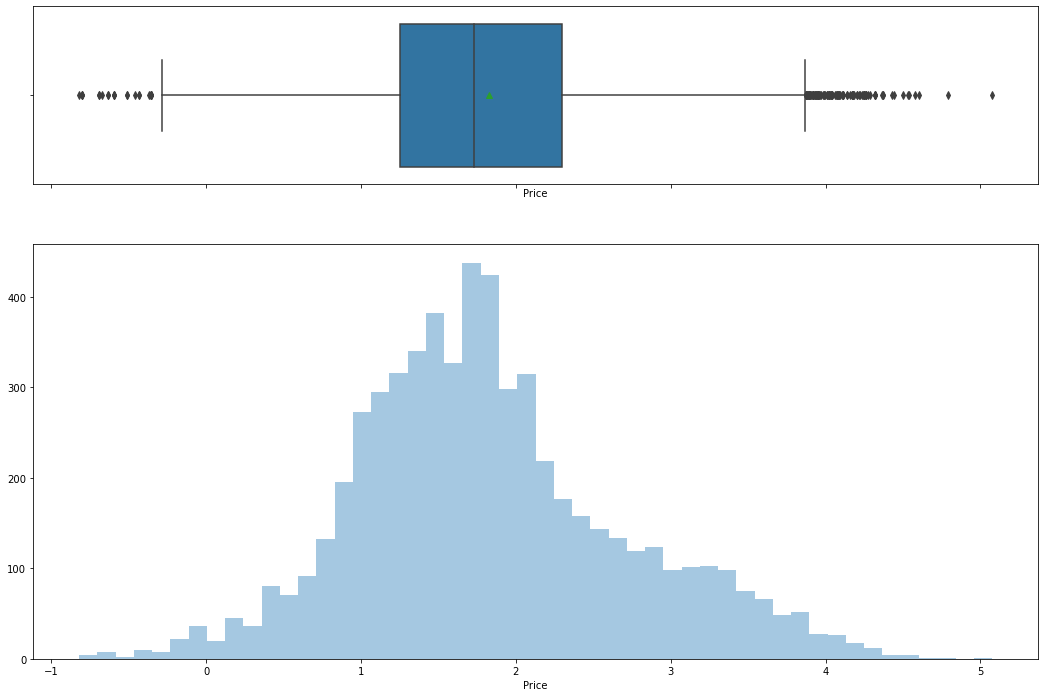

In [39]:
# Log transformation
hist_n_box(np.log(df.Price))

Skew:  1.7050802588491731


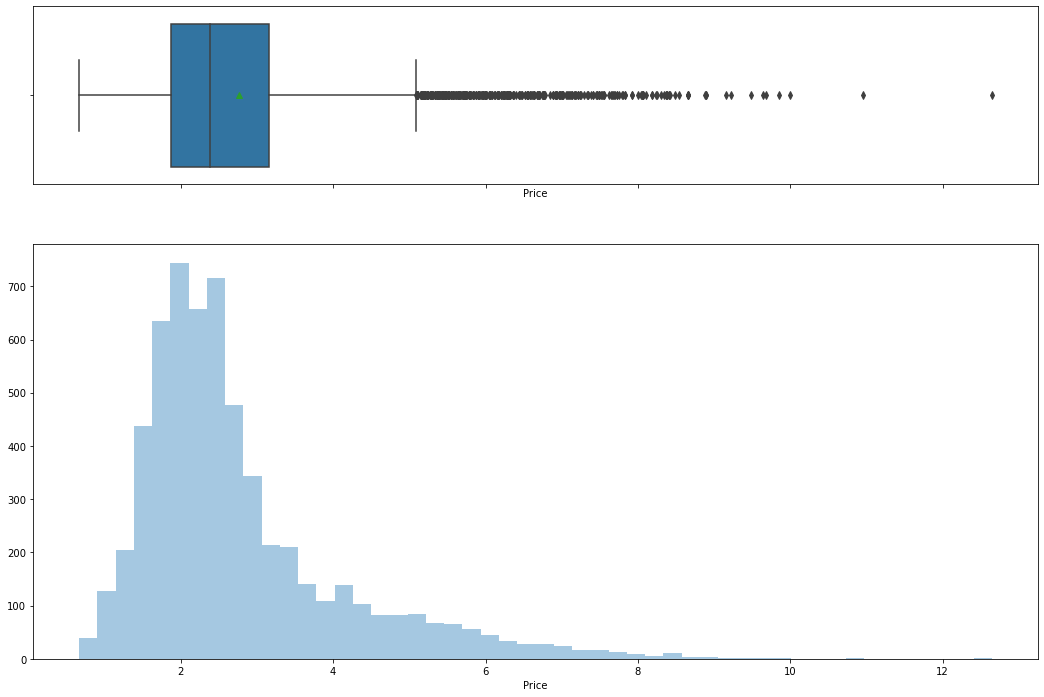

In [40]:
#Square root transformation
hist_n_box(np.sqrt(df.Price))

Skew:  -0.005344968225435458


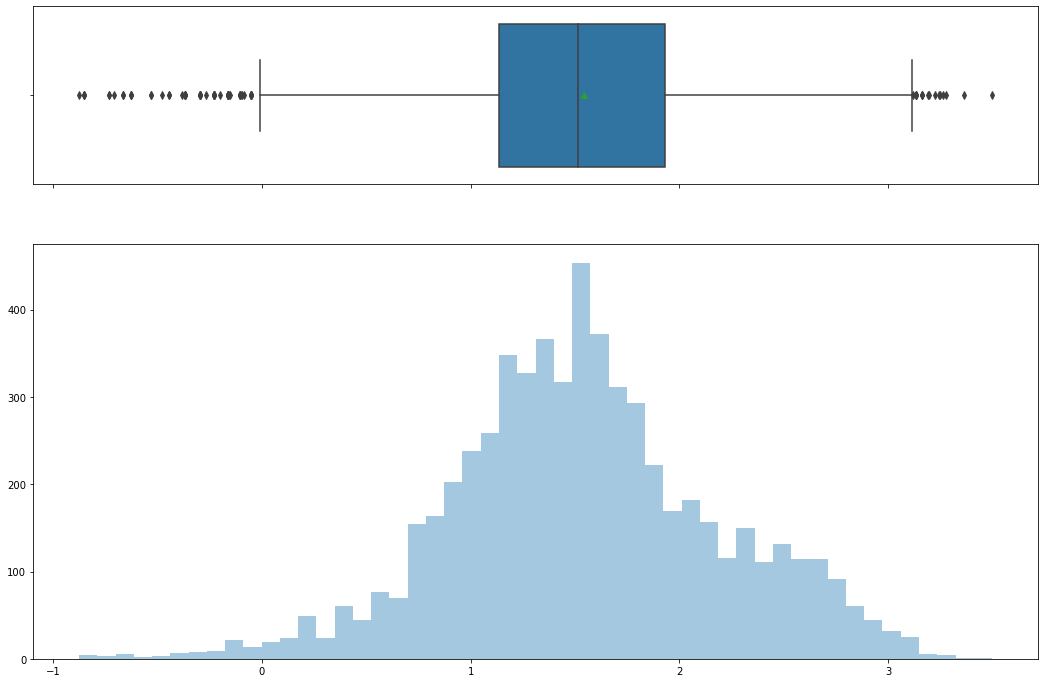

In [41]:
# Let's see if boxcox works for Price too
hist_n_box(pd.Series(stats.boxcox(df.Price)[0]))

The boxcox works best again!


In [42]:
# Add boxcox transformation for Price variable.  I'll make note of the lambda value as well so I can do the inverse operation after prediction.
df['Price_boxcox'], price_lmbda = stats.boxcox(df['Price'])
price_lmbda

-0.15695485443442456

### km/litre

Skew:  0.20892535013457927


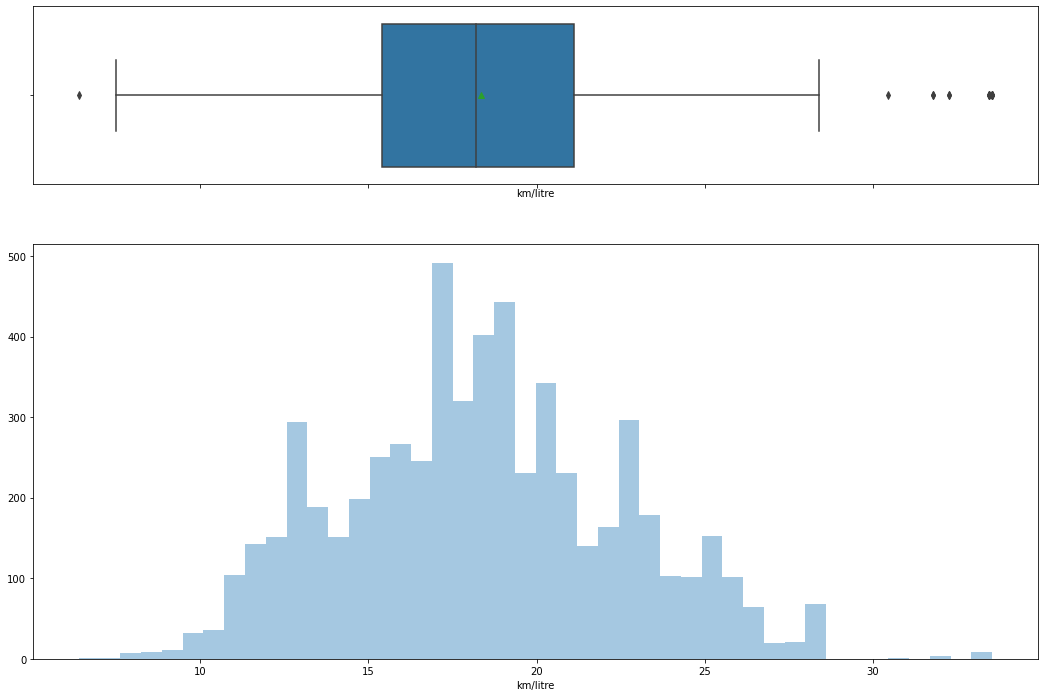

In [43]:
# Call hist_n_box for km/litre variable
hist_n_box(df['km/litre'])

Though km/litre does have a few outliers on both sides, it is more or less normally distributed.

### Engine

Skew:  1.4217690648251582


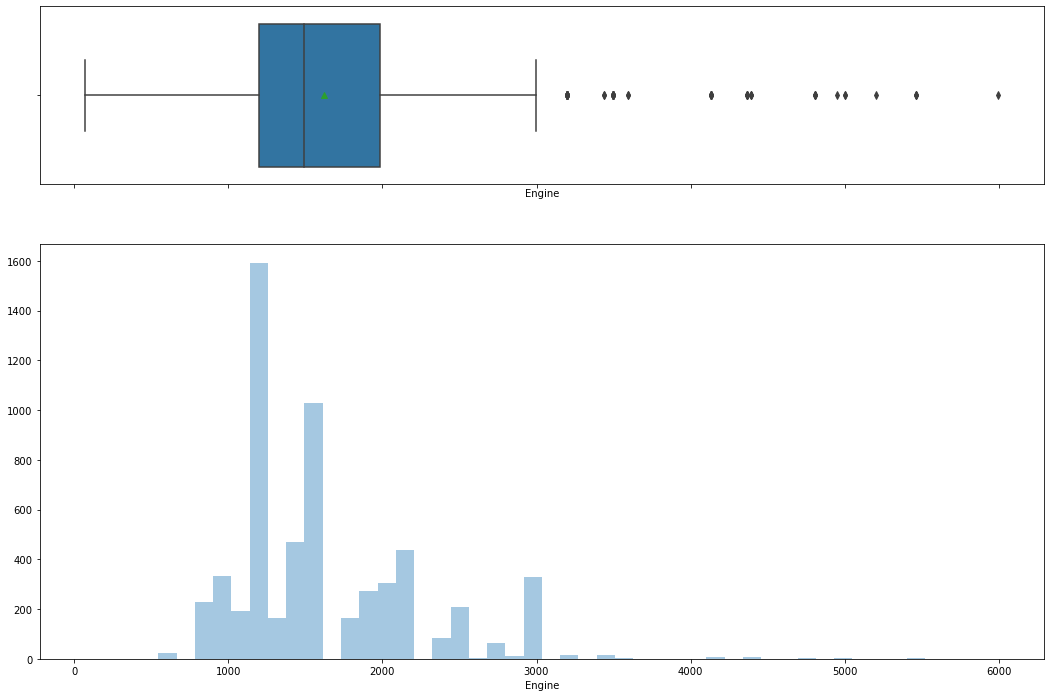

In [44]:
# Call hist_n_box for Engine
hist_n_box(df['Engine'])

The skew on Engine isn't horrible, but we might as well try and fix it.

Skew:  0.29544006955684177


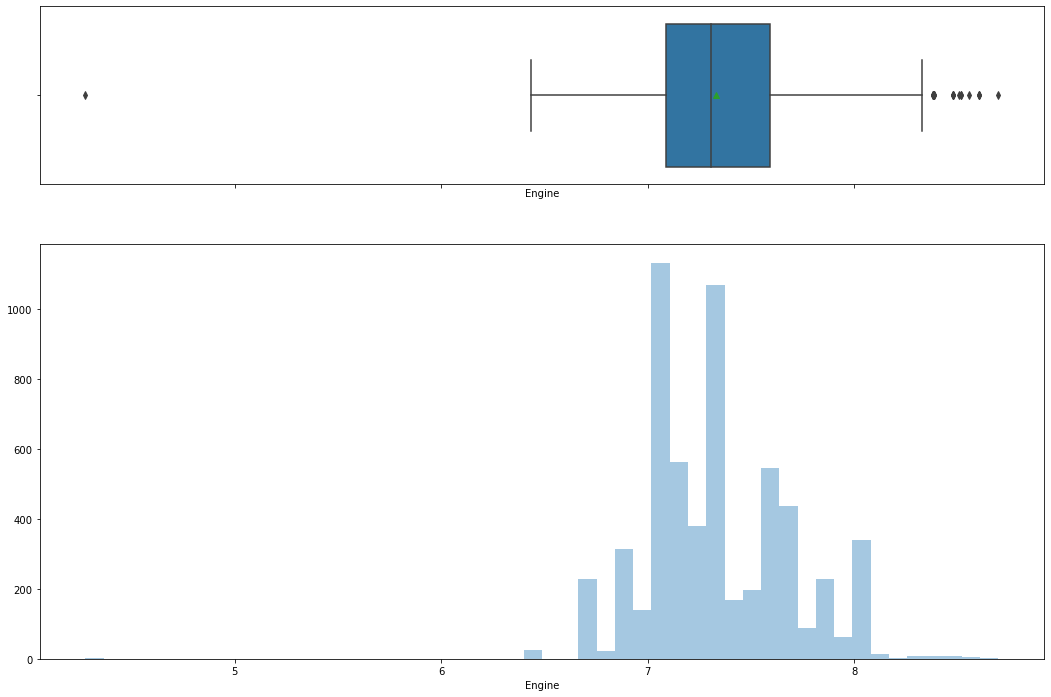

In [45]:
# Log transformation
hist_n_box(np.log(df.Engine))

Skew:  0.868427025585014


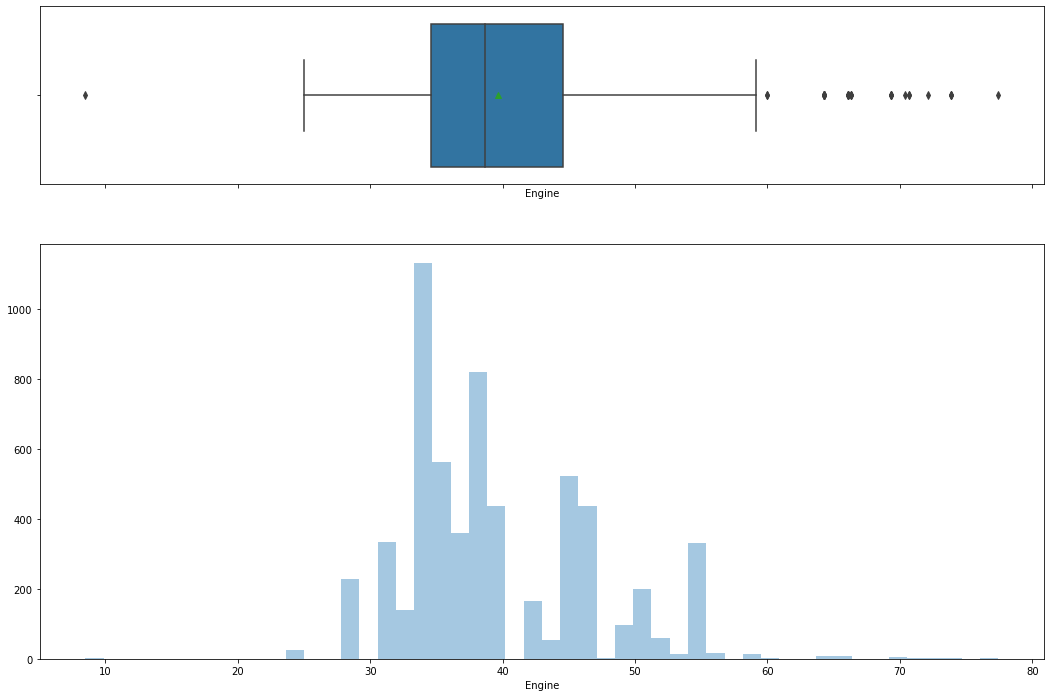

In [46]:
# Square root transformation
hist_n_box(np.sqrt(df.Engine))

Skew:  -0.05102589851689977


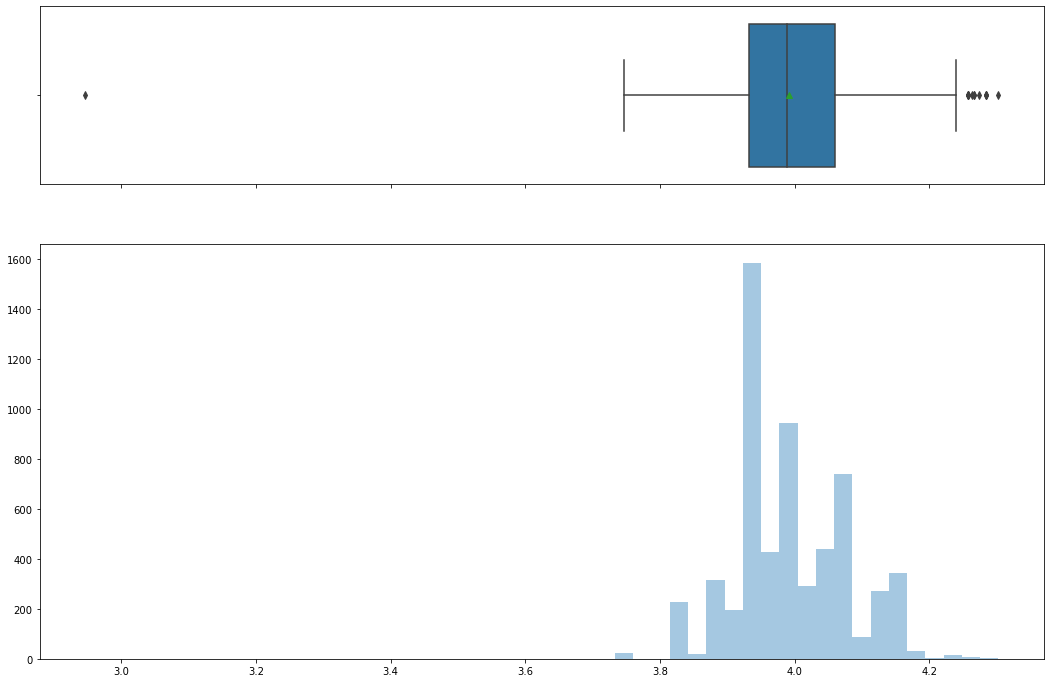

In [47]:
# 3 for 3?
hist_n_box(pd.Series(stats.boxcox(df.Engine)[0]))

Boxcox to the rescue again!

In [48]:
# Add the boxcox of Engine
df['Engine_boxcox'] = stats.boxcox(df['Engine'])[0]

### Power

Skew:  1.9263097531947286


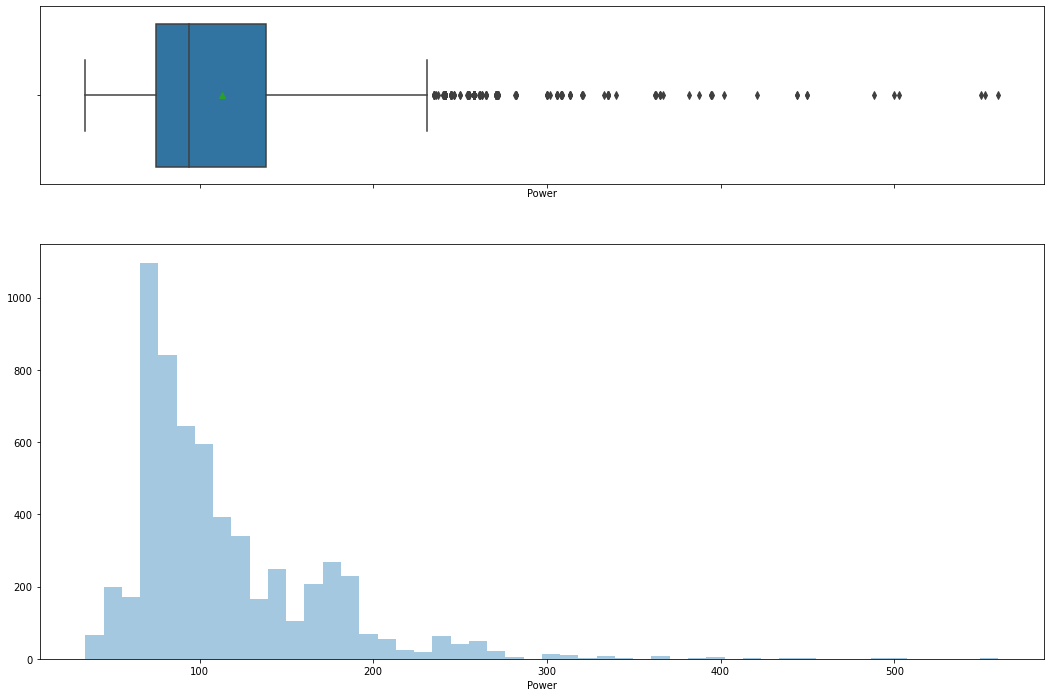

In [49]:
# Call hist_n_box for Power
hist_n_box(df.Power)

Like engine, this data is skewed to the right.

Skew:  0.29544006955684177


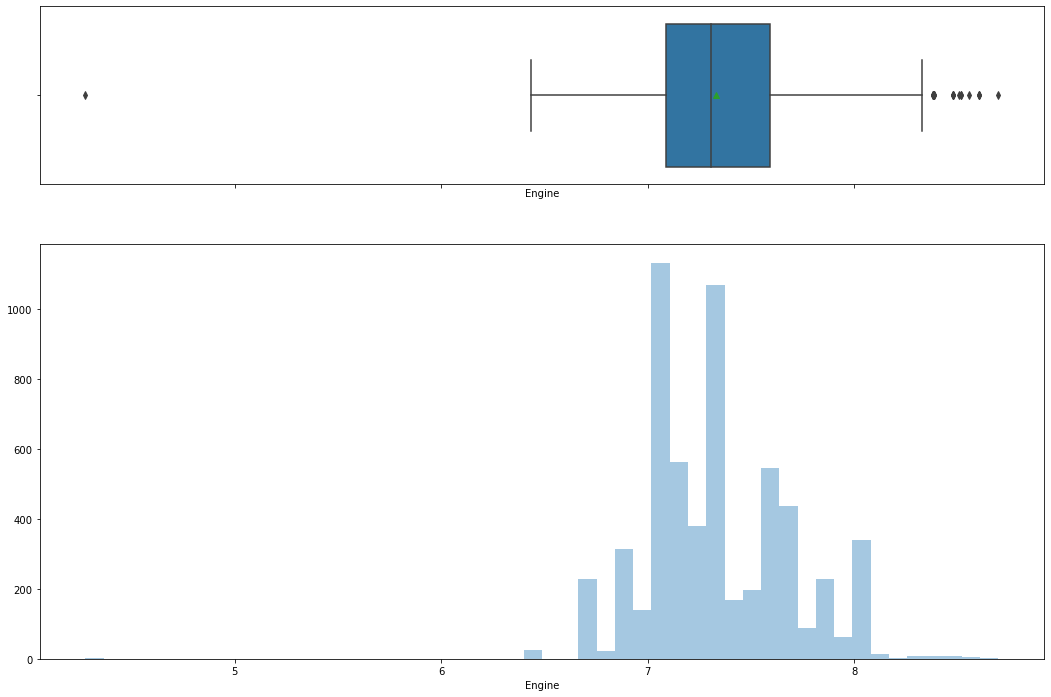

In [50]:
# Log transformation
hist_n_box(np.log(df.Engine))

Skew:  0.868427025585014


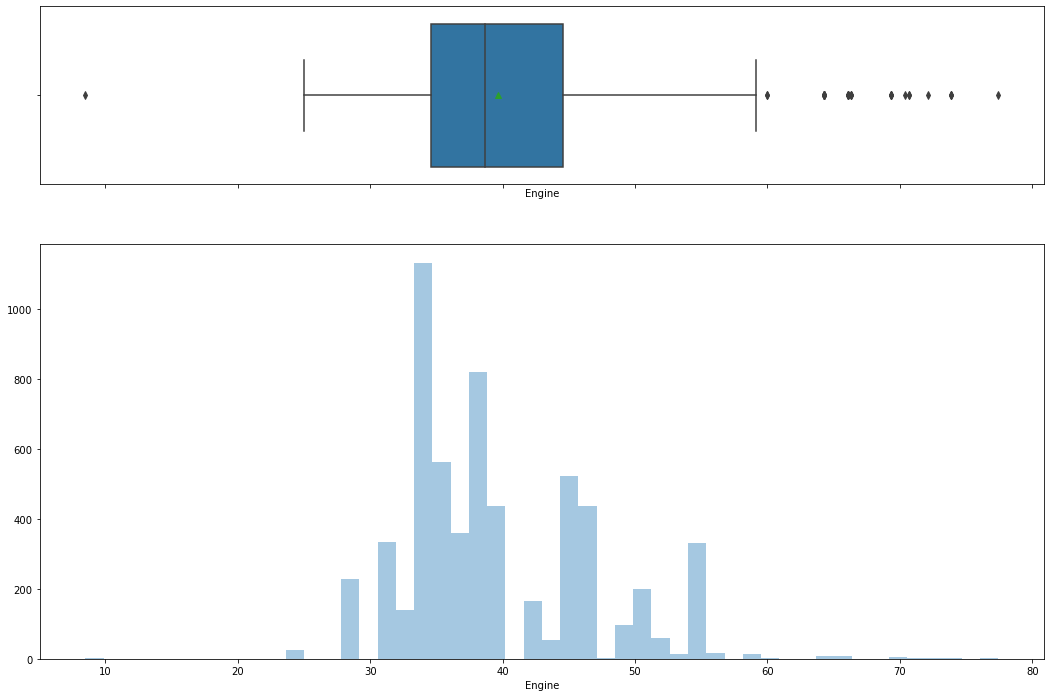

In [51]:
# Square root transformation
hist_n_box(np.sqrt(df.Engine))

Skew:  0.002057836252521593


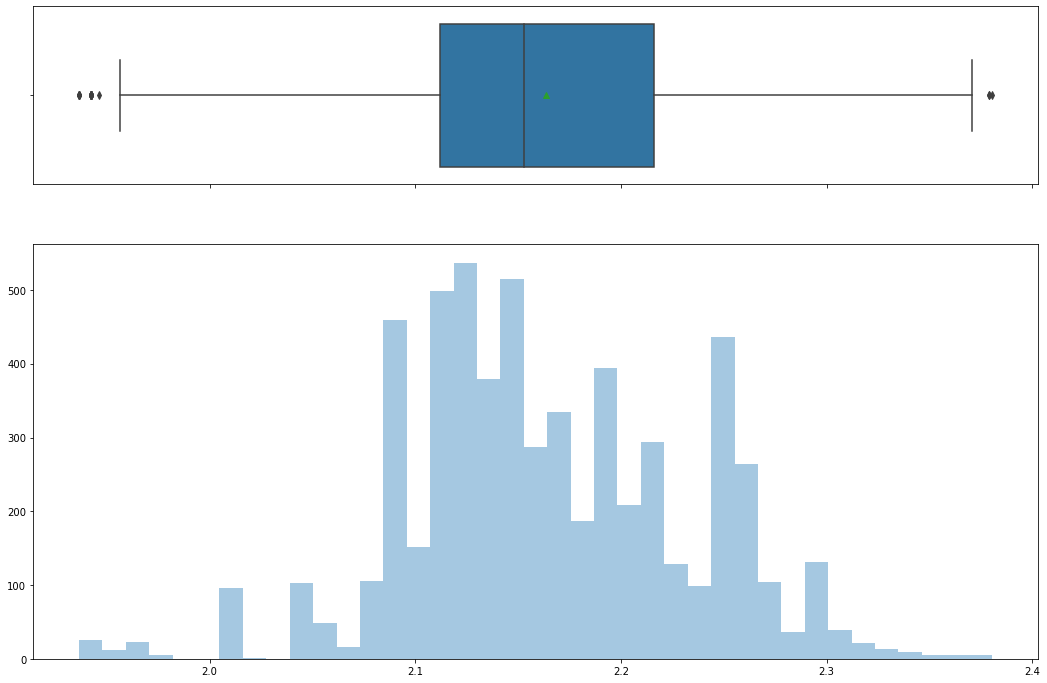

In [52]:
# Boxcox transformation
hist_n_box(pd.Series(stats.boxcox(df.Power)[0]))

Boxcox is a beast!

In [53]:
# We'll add the boxcox of Power to our data.
df['Power_boxcox'] = stats.boxcox(df['Power'])[0]

Whew, I'm glad that's done.  Let's move on to categorical variables.

## Univariate Analysis - Categorical

<AxesSubplot:xlabel='Location', ylabel='count'>

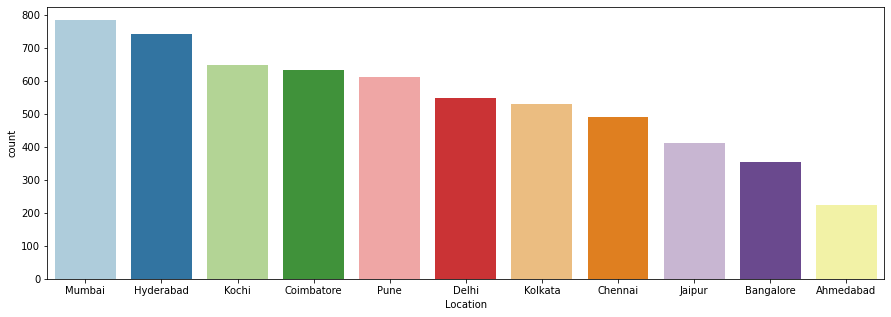

In [54]:
# Create a countplot of Locations
plt.figure(figsize=(15,5))
sns.countplot(df.Location,palette='Paired',order = df.Location.value_counts().index)

Most vehicles are from Mumbai and the least from Ahmedabad.

<AxesSubplot:xlabel='Year', ylabel='count'>

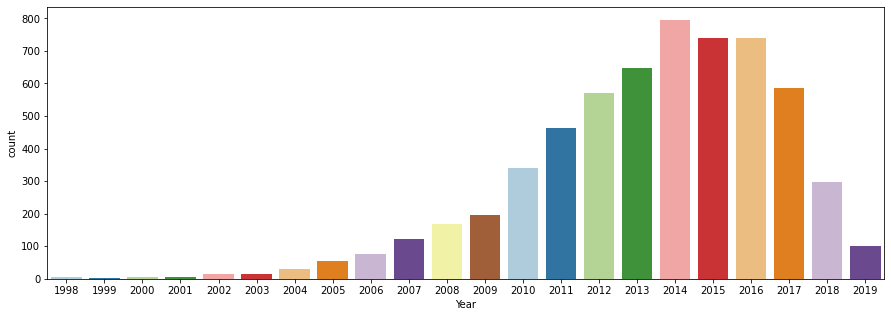

In [55]:
# Create a countplot of Year variable
plt.figure(figsize=(15,5))
sns.countplot(df.Year,palette='Paired')

Most vehicles were built between 2010 and 2018.  This makes sense as older vehicles tend to be scrapped and very new vehicles are still with their first owner.

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

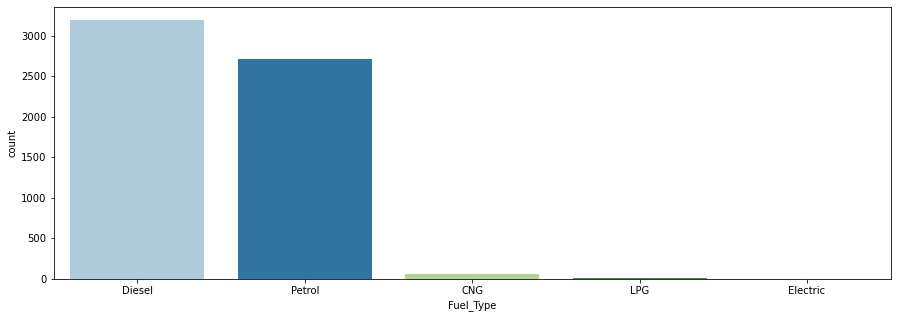

In [56]:
# Create a countplot of Fuel_Type
plt.figure(figsize=(15,5))
sns.countplot(df['Fuel_Type'], palette='Paired',order = df['Fuel_Type'].value_counts().index)

Most vehicles are diesel, with almost as many petrol.  There are barely any CNG, LPG, and electric vehicles.

<AxesSubplot:xlabel='Transmission', ylabel='count'>

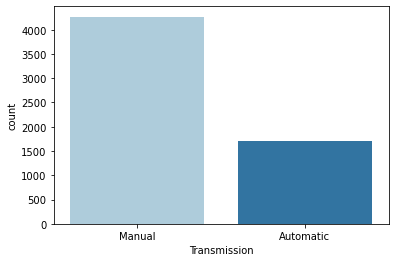

In [57]:
# Create a countplot for Transmission feature
sns.countplot(df.Transmission, palette='Paired',order = df.Transmission.value_counts().index)

Interestingly, most of our vehicles are manuals, more than double the automatics.  I don't think that holds true in this country but I could be wrong.

<AxesSubplot:xlabel='Owner_Type', ylabel='count'>

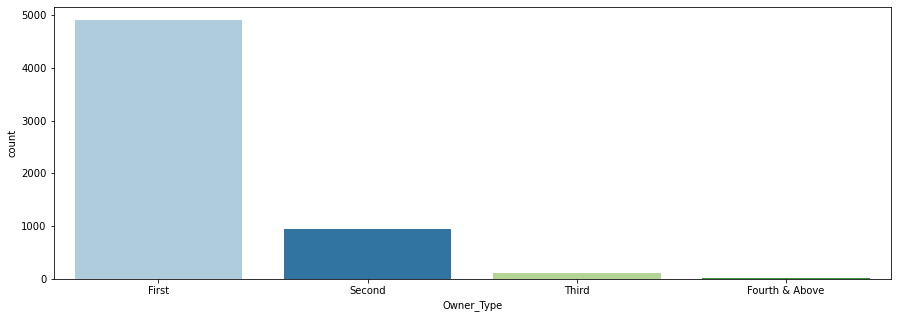

In [58]:
# Create a countplot for Owner_Type feature
plt.figure(figsize=(15,5))
sns.countplot(df['Owner_Type'], palette='Paired', order = df['Owner_Type'].value_counts().index)

As expected, most cars are being sold by their first owner.  There are about 1,000 on the second owner and only a few above that.  

## Bivariate Analysis

## Heatmap

The heatmap will highlight correlations between our different variables.

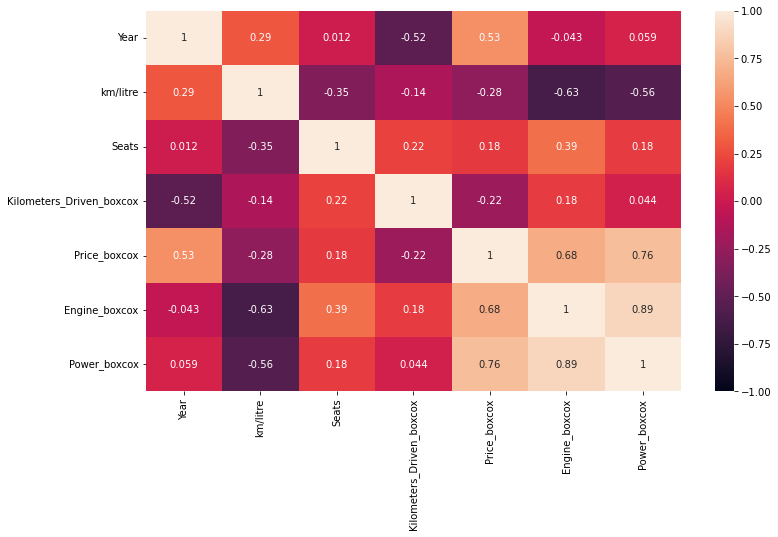

In [59]:
# Plot a heatmap for correlation analysis
plt.figure(figsize=(12, 7))
sns.heatmap(df.drop(['Price', 'Engine', 'Power', 'Kilometers_Driven'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

### Observations:

* Newer cars tend to cost more
* Cars with more Power and Engine CCs tend to cost more.  And so understandably, there is a negative correlation between price and km/litre.
* Thankfully there isn't too much correlation between the independant variables, so we shouldn't have too worry about multicollinearity.

## Scatterplots

We can do scatterplots as well to clearly show the relationship between the features and the dependant variable.

Text(0.5, 1.0, 'km/litre')

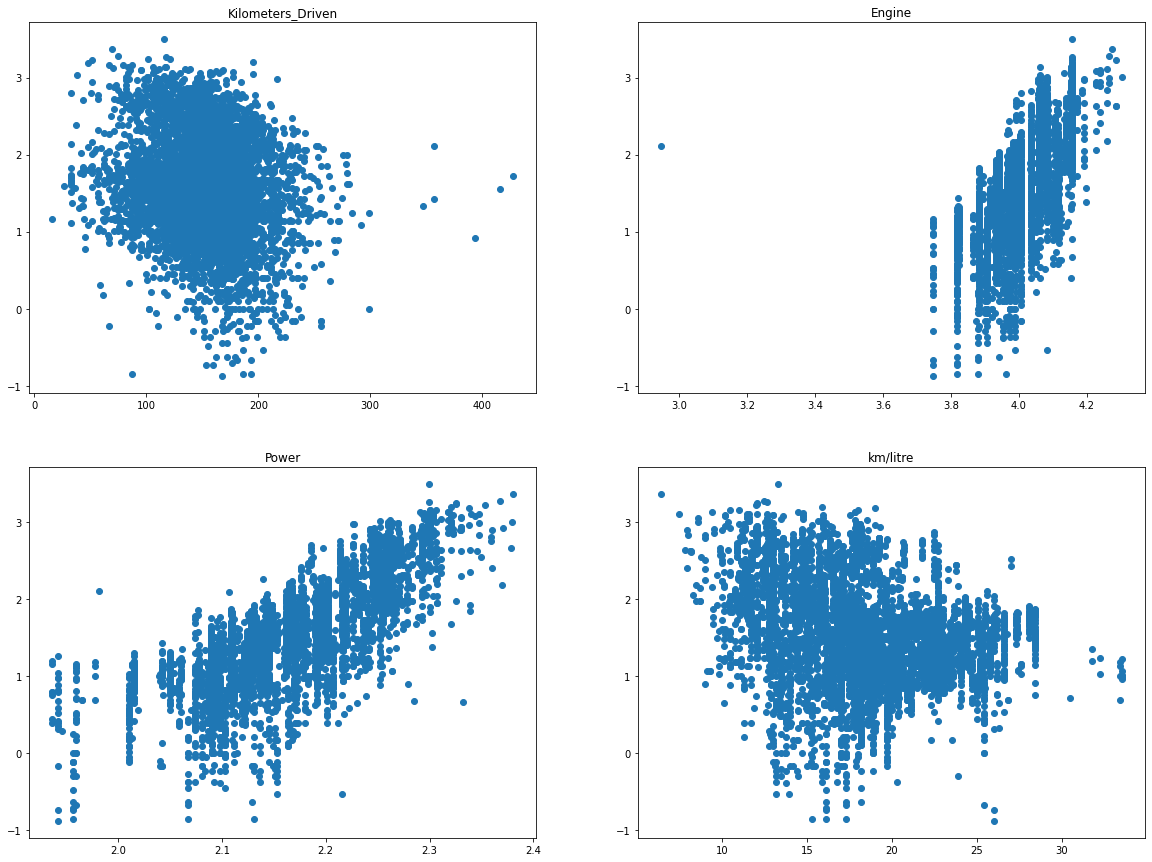

In [60]:
# Scatterplots for numerical variables v. our dependant variable
figure, axis = plt.subplots(2, 2)
figure.set_figheight(15)
figure.set_figwidth(20)

axis[0, 0].scatter(df['Kilometers_Driven_boxcox'], df['Price_boxcox'])
axis[0, 0].set_title('Kilometers_Driven')

axis[0, 1].scatter(df['Engine_boxcox'], df['Price_boxcox'])
axis[0, 1].set_title('Engine')

axis[1, 0].scatter(df['Power_boxcox'], df['Price_boxcox'])
axis[1, 0].set_title('Power')

axis[1, 1].scatter(df['km/litre'], df['Price_boxcox'])
axis[1, 1].set_title('km/litre')

### Observations

* Kilometers Driven doesn't look to have much correlation with Price.
* Both engine and power have a positive correlation.
* Km/litre seems to have a slight negative correlation

## Boxplots

In [61]:
# Boxplot function

def boxplot(feature):
    plt.figure(figsize = (12, 5))
    plt.title('With Outliers')
    sns.boxplot(x = feature, y = df['Price']) 
    plt.show()
    plt.figure(figsize = (12, 5))
    plt.title('Without Outliers')
    sns.boxplot(x = feature, y = df['Price'], showfliers = False) 
    plt.show()

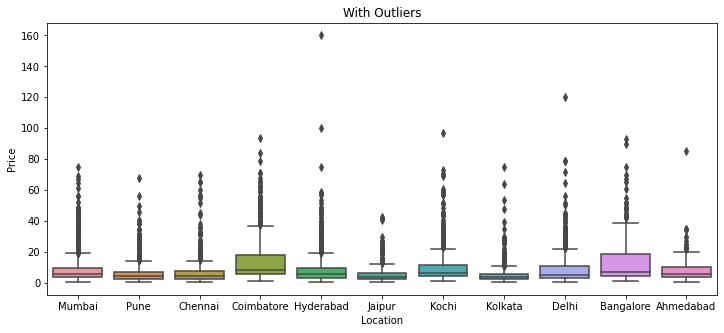

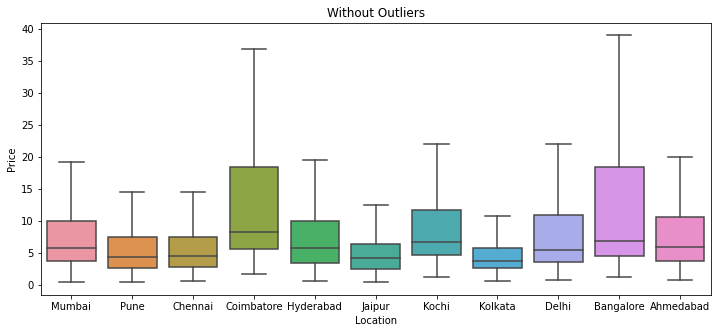

In [62]:
# Call boxplot function for Location
boxplot(df.Location)

### Observations: 

* Ignoring outliers, Coimbatore and Banalore have higher prices, with the high end being around 4 million rupees.  All other locations have their higher end cars costing between 1 and 2 million rupees.

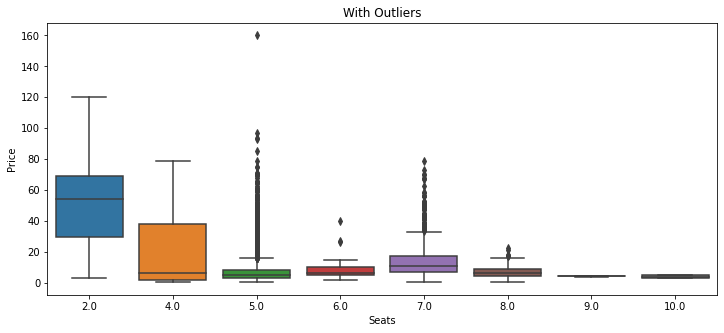

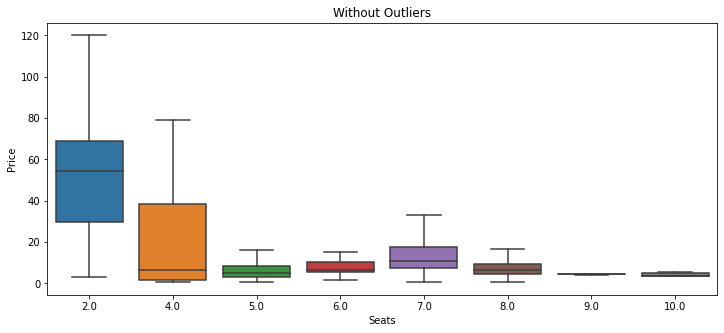

In [63]:
# Call boxplot function for Seats variable
boxplot(df.Seats)

### Observations:

* 2-seaters cost more, which is expected as these are probably sportscars.  Price goes down as number of seats increase which is interesting and a little counter-intuitive.

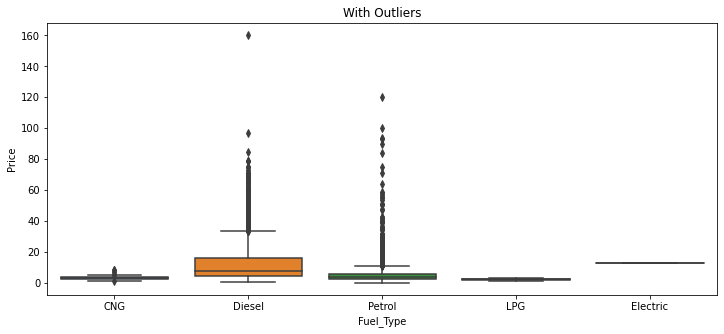

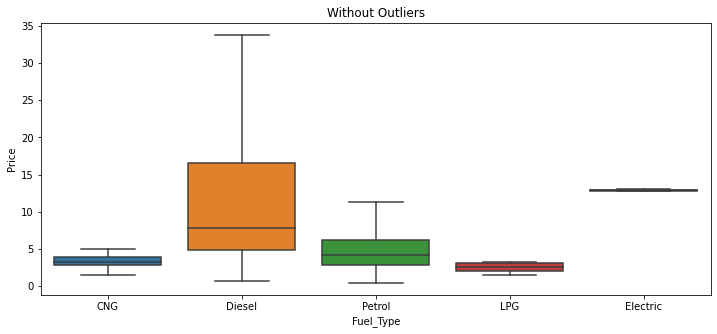

In [64]:
# Call boxplot function for Fuel_Type variable
boxplot(df['Fuel_Type'])

### Observations: 

* Diesel cars tend to cost more than their petrol counterparts.  
* Liquefied petroleum gas (LPG) and compressed natural gas (CNG) are uncommon and cheaper than the other fuel types.  
* Electric vehicles are uncommon in our dataset but their cost is on the higher end.  

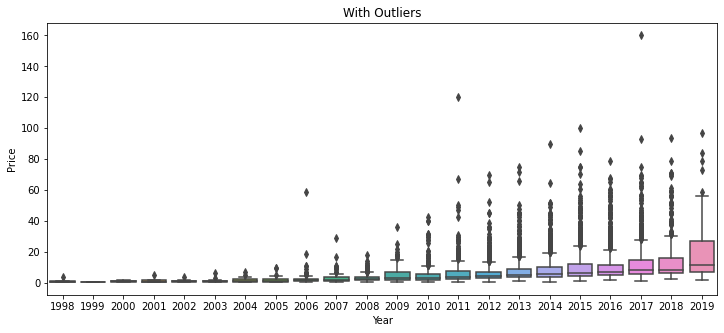

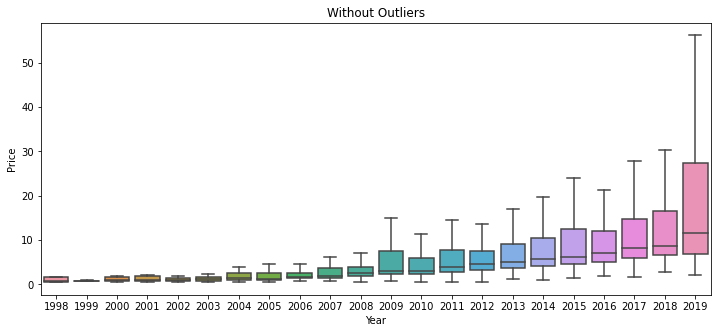

In [65]:
# Call boxplot function for Year variable
boxplot(df.Year)

Observations: 

* No surprises here.  Newer cars cost more.

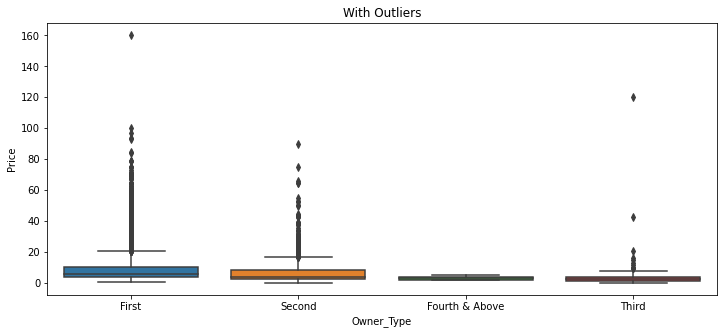

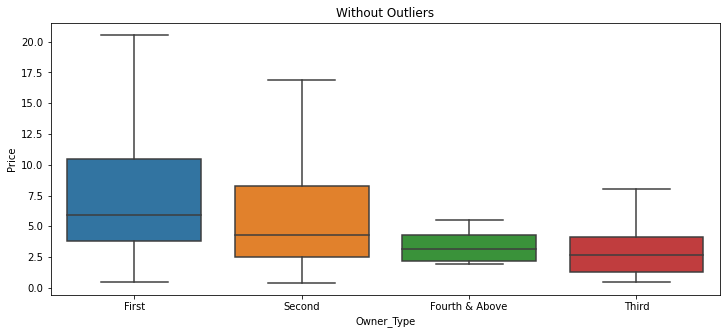

In [66]:
# Call boxplot function for Owner_type variable
boxplot(df['Owner_Type'])

### Observations: 

* Again, no surprises.  Cars with fewer owners (most likely newer cars) cost more.

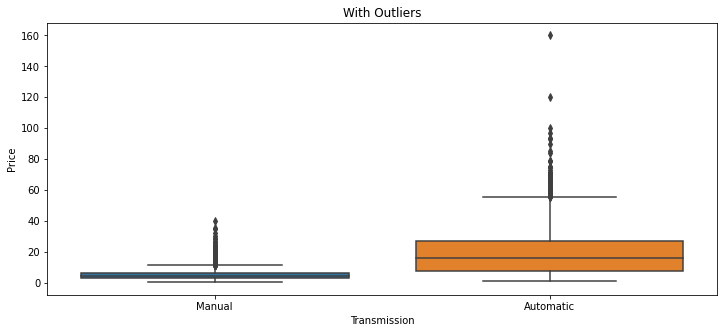

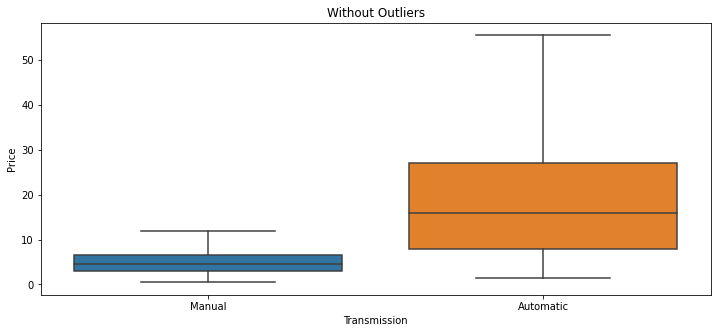

In [67]:
# Call boxplot function for Transmission variable
boxplot(df.Transmission)

### Observations: 

* Automatic cars cost more than manuals.

## Proposed Approach

It's finally time to start some predictions.  Regression time!  Here is what we'll do:

* Simple multivariate linear regression
    * Apply Ridge and Lasso regularization techniques to try and improve results.
* Random forest
    * Hyperparameter tuning with GridSearch

To test our models effectiveness we will measure:

* R-squared and adjusted R-squared.  The closer to 1 (the maximum), the better.
* RMSE or Root Mean Squared Error.  We want as low a value as possible here.

In [68]:
# Export the cleaned dataset for later use
#df.to_csv('cleaned_used_cars.csv')

# Milestone 2

We have extensively cleaned and transformed our data to get it ready for analysis.  We still have a couple of more steps to take before making our model though.

Let's get the libraries and dataframe ready first.

In [69]:
# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from scipy.special import boxcox, inv_boxcox

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [70]:
# Import the cleaned dataset and drop the Unnamed column.  Create a copy as well for later use.
#df = pd.read_csv('cleaned_used_cars.csv')
#df.drop('Unnamed: 0', axis = 1, inplace = True)
df_copy = df.copy()

## Splitting the data

In [71]:
# Seperate the independant variables from the target variable.  Drop the non-transformed variables too.
x = df.drop(['Price', 'Price_boxcox', 'Kilometers_Driven', 'Engine', 'Power', 'Make', 'Model'],axis = 1)
y = df[['Price', 'Price_boxcox']]

In [72]:
# Create dummies dummy
x = pd.get_dummies(x, drop_first = True)

In [73]:
# Split the data into training and test data.
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.3, random_state=1)

## Linear Regression

In [74]:
# Create Linear Regression Model and fit it to the training data
linear_model = LinearRegression().fit(x_train, y_train['Price_boxcox'])

In [75]:
# Prediction time
predict_train = linear_model.predict(x_train)
predict_test = linear_model.predict(x_test)

# Inverse boxcox on the target variable
price_lmbda = -0.15695485443442456
transformed_predict_train = inv_boxcox(predict_train, price_lmbda)
transformed_predict_test = inv_boxcox(predict_test, price_lmbda)

In [76]:
# Check the r_squared values for train and test data
print('Training r-squared: ', r2_score(y_train['Price'], transformed_predict_train))
print('Test r-squared: ', r2_score(y_test['Price'], transformed_predict_test))

Training r-squared:  0.818416277900837
Test r-squared:  0.7678311149770328


The r_squared values are pretty decent.  Almost 82% for our training data and almost 77% for the test data.

In [77]:
# Let's check the rmse value of our model
print('Training rmse: ', mean_squared_error(y_train['Price_boxcox'], predict_train, squared=False))
print('Test rmse: ', mean_squared_error(y_test['Price_boxcox'], predict_test, squared=False))

Training rmse:  0.2176818495382139
Test rmse:  0.22280619611992755


We want low values here for RMSE, so this is good. 

The model performed reasonably well.  We'll try a similar model with the statsmodel package now.

### Linear regression with statsmodel library

In [78]:
# Import statsmodel 
import statsmodels.api as sm

In [79]:
# Add constants
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

### Check for multicollinearity

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(x_train))

                      feature            VIF
0                       const  829714.430149
1                        Year       2.193330
2                    km/litre       3.625602
3                       Seats       1.774375
4    Kilometers_Driven_boxcox       1.815999
5               Engine_boxcox      10.650265
6                Power_boxcox       7.343503
7          Location_Bangalore       2.496270
8            Location_Chennai       3.035021
9         Location_Coimbatore       3.497872
10             Location_Delhi       3.134505
11         Location_Hyderabad       3.771736
12            Location_Jaipur       2.739275
13             Location_Kochi       3.681559
14           Location_Kolkata       3.149712
15            Location_Mumbai       4.091665
16              Location_Pune       3.470736
17           Fuel_Type_Diesel      32.440084
18         Fuel_Type_Electric            NaN
19              Fuel_Type_LPG       1.231972
20           Fuel_Type_Petrol      33.453916
21        

In [81]:
# Drop the Fuel_Type_Electric and Fuel_Type_Petrol columns from training data.  Check VIF again
x_train = x_train.drop(columns = ['Fuel_Type_Petrol', 'Fuel_Type_Electric'])
x_test = x_test.drop(columns = ['Fuel_Type_Petrol', 'Fuel_Type_Electric'])
checking_vif(x_train)

,feature,VIF
0,const,828424.562277
1,Year,2.193156
2,km/litre,3.448308
3,Seats,1.770791
4,Kilometers_Driven_boxcox,1.810136
5,Engine_boxcox,10.419201
6,Power_boxcox,7.275837
7,Location_Bangalore,2.496159
8,Location_Chennai,3.034648
9,Location_Coimbatore,3.496720


In [82]:
# Looks like we'll need to drop one more column, Engine_boxcox.  This makes sense since we know it is correlated with Power_boxcox
x_train = x_train.drop(columns = 'Engine_boxcox')
x_test = x_test.drop(columns = 'Engine_boxcox')
checking_vif(x_train)

,feature,VIF
0,const,803966.211820
1,Year,2.179415
2,km/litre,2.815208
3,Seats,1.633841
4,Kilometers_Driven_boxcox,1.808726
5,Power_boxcox,2.878245
6,Location_Bangalore,2.496158
7,Location_Chennai,3.033801
8,Location_Coimbatore,3.495989
9,Location_Delhi,3.133958


All VIF scores are under 5 meaning we have removed multicollinearity from our data and satisfied that assumption of linear regression.  We can proceed.

In [83]:
# Create the OLS model
ols_model = sm.OLS(y_train['Price_boxcox'], x_train).fit()

In [84]:
# Print summary statistis
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_boxcox   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1515.
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:05:18   Log-Likelihood:                 378.23
No. Observations:                4184   AIC:                            -712.5
Df Residuals:                    4162   BIC:                            -573.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -179.5785      3.072    -58.450      0.000    -185.602    -173.555
Year                          0.0847      0.002     54.915      0.000       0.082       0.088
km/litre                     -0.0103      0.001     -7.378      0.000      -0.013      -0.008
Seats                         0.0170      0.005      3.203      0.001       0.007       0.027
Kilometers_Driven_boxcox     -0.0013      0.000    -10.026      0.000      -0.001      -0.001
Power_boxcox                  5.0379      0.084     59.757      0.000       4.873       5.203
Location_Bangalore            0.1333      0.023      5.845      0.000       0.089       0.178
Location_Chennai              0.0264      0.022      1.225      0.221      -0.016       0.069
Location_Coimbatore           0.0819      0.021      3.891      0.000       0.041       0.123
Location_Delhi               -0.0307      0.021     -1.444      0.149      -0.072       0.011
Location_Hyderabad            0.1179      0.021      5.736      0.000       0.078       0.158
Location_Jaipur              -0.0353      0.022     -1.594      0.111      -0.079       0.008
Location_Kochi               -0.0153      0.021     -0.734      0.463      -0.056       0.026
Location_Kolkata             -0.1958      0.021     -9.124      0.000      -0.238      -0.154
Location_Mumbai              -0.0475      0.020     -2.335      0.020      -0.087      -0.008
Location_Pune                -0.0412      0.021     -1.970      0.049      -0.082      -0.000
Fuel_Type_Diesel              0.2326      0.010     24.419      0.000       0.214       0.251
Fuel_Type_LPG                 0.1010      0.084      1.198      0.231      -0.064       0.266
Transmission_Manual          -0.2233      0.010    -22.235      0.000      -0.243      -0.204
Owner_Type_Fourth & Above     0.0197      0.079      0.249      0.803      -0.135       0.175
Owner_Type_Second            -0.0626      0.010     -6.220      0.000      -0.082      -0.043
Owner_Type_Third             -0.1195      0.027     -4.452      0.000      -0.172      -0.067
==============================================================================
Omnibus:                      744.997   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4669.243
Skew:                          -0.698   Prob(JB):                         0.00
Kurtosis:                       7.984   Cond. No.                     1.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We have an r-squared value of .88, even better than our first model.  There are a few variables here that aren't significant, their p value is over .05.  I'm going to remove those variables and try again.

In [85]:
# Drop insignificant variables and refit our model
x_train = x_train.drop(columns = ['Location_Chennai', 'Location_Delhi', 'Location_Jaipur', 'Location_Kochi', 'Fuel_Type_LPG', 'Owner_Type_Fourth & Above'])
x_test = x_test.drop(columns = ['Location_Chennai', 'Location_Delhi', 'Location_Jaipur', 'Location_Kochi', 'Fuel_Type_LPG', 'Owner_Type_Fourth & Above'])
ols_model = sm.OLS(y_train['Price_boxcox'], x_train).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_boxcox   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     2114.
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:05:18   Log-Likelihood:                 369.12
No. Observations:                4184   AIC:                            -706.2
Df Residuals:                    4168   BIC:                            -604.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -178.7050      3.014    -59.295      0.000    -184.614    -172.796
Year                         0.0843      0.002     55.684      0.000       0.081       0.087
km/litre                    -0.0102      0.001     -7.353      0.000      -0.013      -0.007
Seats                        0.0170      0.005      3.207      0.001       0.007       0.027
Kilometers_Driven_boxcox    -0.0013      0.000    -10.070      0.000      -0.002      -0.001
Power_boxcox                 5.0368      0.084     60.076      0.000       4.872       5.201
Location_Bangalore           0.1447      0.015      9.510      0.000       0.115       0.174
Location_Coimbatore          0.0948      0.012      7.750      0.000       0.071       0.119
Location_Hyderabad           0.1305      0.012     11.300      0.000       0.108       0.153
Location_Kolkata            -0.1838      0.013    -13.885      0.000      -0.210      -0.158
Location_Mumbai             -0.0354      0.011     -3.165      0.002      -0.057      -0.013
Location_Pune               -0.0296      0.012     -2.441      0.015      -0.053      -0.006
Fuel_Type_Diesel             0.2333      0.009     24.556      0.000       0.215       0.252
Transmission_Manual         -0.2243      0.010    -22.312      0.000      -0.244      -0.205
Owner_Type_Second           -0.0624      0.010     -6.208      0.000      -0.082      -0.043
Owner_Type_Third            -0.1110      0.027     -4.157      0.000      -0.163      -0.059
==============================================================================
Omnibus:                      743.885   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4689.574
Skew:                          -0.695   Prob(JB):                         0.00
Kurtosis:                       7.997   Cond. No.                     1.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We've removed the insignificant variables and tried again.  The performance remains consistant at .88 for r_squared and adjusted r_squared.

### Let's check other assumptions of linear regression

1. **Mean of residuals**

In [86]:
# Check the mean of residuals
ols_model.resid.mean()

-4.2420383914710723e-13

The mean of residuals is very close to 0 so this assumption is satisfied.

2. **No Heteroscedasticity** - (If the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic, not heteroscedastic.)

We'll use the Goldfeldquandt Test to see if this is so.  When we run the test, if it comes back insignificant in terms of the p-value, we can assume that the data does not have heteroscedasticity.

In [87]:
# Here are the libraries we'll need
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [88]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train['Price_boxcox'], x_train)
lzip(name, test)

[('F statistic', 0.9595937991116279), ('p-value', 0.8262589158588757)]

The p-value is quite high so we don't reject the null hypothesis that the data is homoscedastic.  This assumption is satisfied.

3. **Linearity of variables**

The predictor variables must have a linear relation with the dependent variable.

To test, let's plot residuals and fitted values on a plot so we can check that they don't have a strong pattern.  They should be randomly and uniformly distributed.

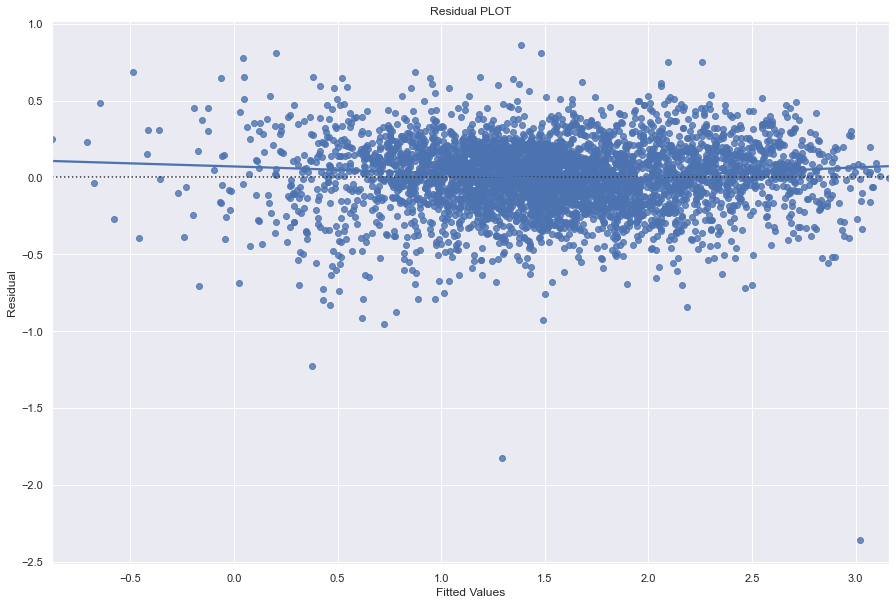

In [89]:
# These are the predicted values
fitted = ols_model.fittedvalues

# Create a plot with the fitted values and the residuals
sns.set(rc={'figure.figsize':(15, 10)})
sns.residplot(x = fitted, y = ols_model.resid, lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

This is what we want to see, the values are randomly and uniformly distributed on the x-axis.  We have fulfilled this assumption.  Lastly...

4. **Normality of error terms** - This means that the residuals should form a normal distribution when plotted



<AxesSubplot:ylabel='Count'>

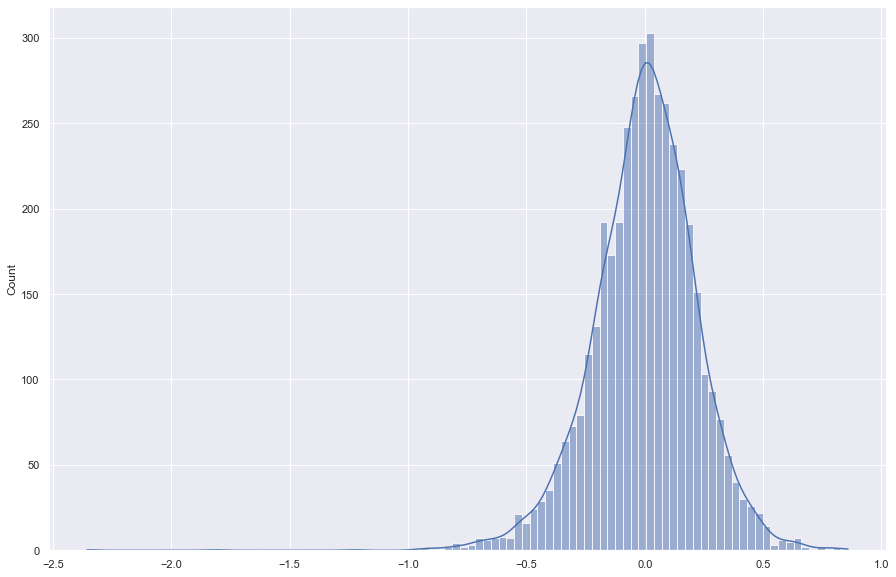

In [90]:
# Plot histogram of residuals
sns.histplot(ols_model.resid, kde = True)

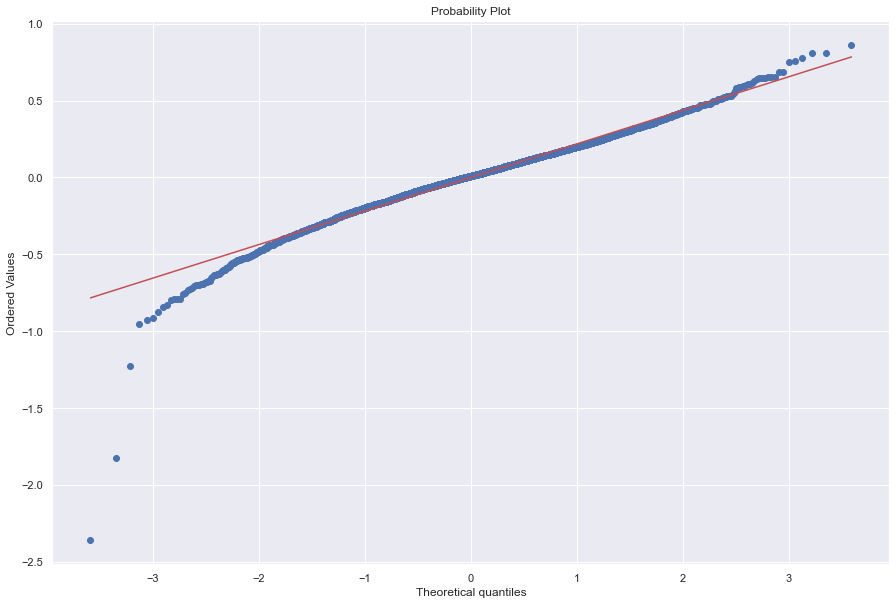

In [91]:
# Plot a q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(ols_model.resid, dist="norm", plot=pylab)
plt.show()

This looks normal to me.  We're good to go!!!

### Check the model performance


In [92]:
# Import libraries to measure metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

# Function to check performance of model
def model_perf(ols_model, x_train, x_test, y_train, y_test):

    # Prediction on training data
    y_pred_train = ols_model.predict(x_train)
    y_observed_train = y_train['Price_boxcox']

    # Prediction on test data
    y_pred_test = ols_model.predict(x_test)
    y_observed_test = y_test['Price_boxcox']
    
    # Calculate RMSE
    rmse_train = mean_squared_error(y_observed_train, y_pred_train, squared=False)
    rmse_test = mean_squared_error(y_observed_test, y_pred_test, squared=False)
    
    # Calculate MAPE
    mape_train = mean_absolute_percentage_error(y_observed_train, y_pred_train)
    mape_test = mean_absolute_percentage_error(y_observed_test, y_pred_test)
    
    # Calculate MAE
    mae_train = mean_absolute_error(y_observed_train, y_pred_train)
    mae_test = mean_absolute_error(y_observed_test, y_pred_test)
    
    print(f'RMSE on the training data is {rmse_train}\nRMSE on the testing data is {rmse_test}\n')
    print(f'MAPE on the training data is {mape_train}\nMAPE on the testing data is {mape_test}\n')
    print(f'MAE on the training data is {mae_train}\nMAE on the testing data is {mae_test}')

In [93]:
# Call the function to find the RMSE value
model_perf(ols_model, x_train, x_test, y_train, y_test)

RMSE on the training data is 0.2215379205979736
RMSE on the testing data is 0.22414287061076815

MAPE on the training data is 4672125531498.564
MAPE on the testing data is 3268335467673.4736

MAE on the training data is 0.16627808659332086
MAE on the testing data is 0.16584818281020186


RMSE is pretty good, .22 for both the training and the test data.  Both the RMSE and MAE values are very similar for training and test sets.  This indicates that we haven't under or overfit.  We'll want to see if we can improve this model through regularization.

## Regularization
### Ridge

In [94]:
# Here is the libraries we need for Ridge and Lasso regularization
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [95]:
#Fitting Ridge with the default features
ridge = Ridge().fit(x_train, y_train['Price_boxcox'])

In [96]:
# Here is the r_squared score
print('R_squared: ', ridge.score(x_train, y_train['Price_boxcox']))

R_squared:  0.8822533816673758


In [97]:
# Call our model_perf function on the Ridge model
model_perf(ridge, x_train, x_test, y_train, y_test)

RMSE on the training data is 0.22301378107183176
RMSE on the testing data is 0.22434541400429206

MAPE on the training data is 5061863329331.933
MAPE on the testing data is 3158174270318.721

MAE on the training data is 0.16780401083570598
MAE on the testing data is 0.16645744168858206


We have a good r_squared of 88% and the RMSE is pretty low.

### Lasso

In [98]:
# Let's try the same with Lasso regularization
lasso = Lasso().fit(x_train, y_train['Price_boxcox'])

In [99]:
# Here is the r_squared for Lasso
lasso.score(x_train, y_train['Price_boxcox'])

0.046329648492038134

In [100]:
model_perf(lasso, x_train, x_test, y_train, y_test)

RMSE on the training data is 0.6346826406638042
RMSE on the testing data is 0.6195282715206849

MAPE on the training data is 18644147557443.117
MAPE on the testing data is 10850533110980.438

MAE on the training data is 0.4960032878502145
MAE on the testing data is 0.48730735928422453


I'm not sure why this model is performing so poorly, let's try adjusting the alpha level.

In [101]:
# Try different alpha levels for Lasso regression
for i in range(1, 10):
    lasso = Lasso(alpha = (i * 0.1)).fit(x_train, y_train['Price_boxcox'])
    print('R_squared: ', lasso.score(x_train, y_train['Price_boxcox']))

R_squared:  0.5788697234845428
R_squared:  0.4754664504674634
R_squared:  0.4491397373114784
R_squared:  0.40950009279260313
R_squared:  0.3583168130291434
R_squared:  0.29575781916424104
R_squared:  0.2218298531240408
R_squared:  0.13652211117904722
R_squared:  0.06675642242477708


So this just isn't working for our problem.  I'm going to stick with Ridge regression and try tuning it's alpha value.
### Back to Ridge

In [102]:
# Try different alpha levels for Ridge regression
for i in range(1, 10):
    ridge = Ridge(alpha = (i * 0.1)).fit(x_train, y_train['Price_boxcox'])
    print('R_squared: ', ridge.score(x_train, y_train['Price_boxcox']))

R_squared:  0.8837869334014032
R_squared:  0.8837299045483475
R_squared:  0.8836386638171231
R_squared:  0.8835160401061598
R_squared:  0.8833646349172538
R_squared:  0.8831868423244184
R_squared:  0.882984866998454
R_squared:  0.8827607404963446
R_squared:  0.8825163360000123


The r_squared is staying consistant at 88%

In the end, the ols_model and the Ridge model both provided about the same results.  I'll go back to the ols_model and print out the actual equation.  Then we'll move on to Random Forest to see if we can improve our results.

In [103]:
# Here are the coefficients
coefs = ols_model.params
coefs = coefs.to_frame(name = 'coefficients')
coefs.reset_index(inplace=True)
coefs = coefs.rename(columns = {'index':'feature'})
coefs

,feature,coefficients
0,const,-178.705030
1,Year,0.084275
2,km/litre,-0.010211
3,Seats,0.016990
4,Kilometers_Driven_boxcox,-0.001258
5,Power_boxcox,5.036811
6,Location_Bangalore,0.144661
7,Location_Coimbatore,0.094824
8,Location_Hyderabad,0.130461
9,Location_Kolkata,-0.183772


In [104]:
# Here is the equation of the fitted line
print('boxcox(Price) =', coefs.iloc[0, 1], '+', end = ' ')
for i in range(len(coefs)):
    if i == 0:
        continue
    elif i == len(coefs) - 1:
        print('(', coefs.iloc[i, 1], ')*', coefs.iloc[i, 0], sep = '', end = '')
    else:
        print('(', coefs.iloc[i, 1], ')*', coefs.iloc[i, 0], '  +  ', sep = '', end = '')

boxcox(Price) = -178.70502998640828 + (0.08427516540780855)*Year  +  (-0.010211344149995681)*km/litre  +  (0.01699021982688497)*Seats  +  (-0.0012581078820459008)*Kilometers_Driven_boxcox  +  (5.036811445351856)*Power_boxcox  +  (0.14466141619918227)*Location_Bangalore  +  (0.09482350720780013)*Location_Coimbatore  +  (0.13046110370559522)*Location_Hyderabad  +  (-0.18377225125022686)*Location_Kolkata  +  (-0.03537969692492453)*Location_Mumbai  +  (-0.029572505296717705)*Location_Pune  +  (0.23328339130286044)*Fuel_Type_Diesel  +  (-0.22434612282809746)*Transmission_Manual  +  (-0.06235265577341502)*Owner_Type_Second  +  (-0.1110167744678538)*Owner_Type_Third

## Random Forest

A simple decision tree is usually not going to be sophisticated enough to solve any business problem.  Plus they are prone to overfitting.  We're going to jump right into Random Forest.  Random Forest will create many decision trees with many "bagged" datasets.  It will also randomly pick which features to consider at each branch.  It will then aggregate to come up with a prediction.  This is a much more accurate model and I'm curious to see if we can beat our results from linear regression.

In [105]:
# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [106]:
# Create train and test dataset for Random Forest regressor
rf_x_train, rf_x_test, rf_y_train, rf_y_test =train_test_split(x, y, test_size=0.3, random_state=2)

In [107]:
# Random Forest Regressor and fitting
rf_regressor = RandomForestRegressor(random_state = 2)

# Fitting the model
rf_regressor.fit(rf_x_train, rf_y_train['Price_boxcox'])

RandomForestRegressor(random_state=2)

In [108]:
# function to compute different metrics to check performance of a regression model
def model_performance(model, predictors, target):
    
    # predicting using the independent variables
    pred = model.predict(predictors)
    
    # R_squared
    r2 = model.score(predictors, target['Price_boxcox'])
    print('R_squared: ', r2)
    
    # Adjusted r_squared
    n = predictors.shape[0]
    k = predictors.shape[1]
    print('Adjusted R-squared: ', (1 - ((1 - r2) * (n - 1) / (n - k - 1))))
    
    # Mean absolute error
    mae = mean_absolute_error(target['Price_boxcox'], pred)
    print('Mean absolute error: ', mae)
    
     # MAPE
    mape = mean_absolute_percentage_error(target['Price_boxcox'], pred)
    print('MAPE: ', mape)
    
    # RMSE
    rmse = mean_squared_error(target['Price_boxcox'], pred, squared=False)
    print('RMSE: ', rmse)

In [109]:
# Check Random Forest model with our function
model_performance(rf_regressor, rf_x_test, rf_y_test)

R_squared:  0.9283846551905369
Adjusted R-squared:  0.9274130507386279
Mean absolute error:  0.1210442474377235
MAPE:  2677003197699.088
RMSE:  0.17335904557662313


I'm pretty happy with this.  Now I want to try hyperparameter tuning to see if we can improve our results any more.  Then we'll look at which of the features are the most important.

In [110]:
# Check the parameters our current model is using
rf_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [111]:
# New regressor
rf_tuned = RandomForestRegressor(random_state=3)

# Grid of parameters to choose from
parameters = {'n_estimators': [90, 100, 110, 120, 130],
              'max_depth': [5, 6, 7],
              'max_features': [0.8, 1, 1.2],
              'min_samples_split': [2, 4, 7, 10],
              'min_samples_leaf': [2, 4, 7, 10]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(rf_x_train,rf_y_train)

# Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = grid_obj.best_estimator_

rf_tuned_regressor.fit(rf_x_train, rf_y_train['Price_boxcox'])

RandomForestRegressor(max_depth=7, max_features=0.8, min_samples_leaf=2,
                      n_estimators=120, random_state=3)

In [112]:
# Call our performance function on the tuned model
model_performance(rf_tuned_regressor, rf_x_test, rf_y_test)

R_squared:  0.9038449636855365
Adjusted R-squared:  0.9025404295580367
Mean absolute error:  0.14945817679988183
MAPE:  3686884928965.2256
RMSE:  0.20087666143089344


Unfortunately, that didn't work as well as our base model.  We could try giving it more parameters to grid search through or we can be content with the first Random Forest model.  Due to time constraints, I'll have to stick with the first Random Forest model.  Let's see which features are most important to that model.


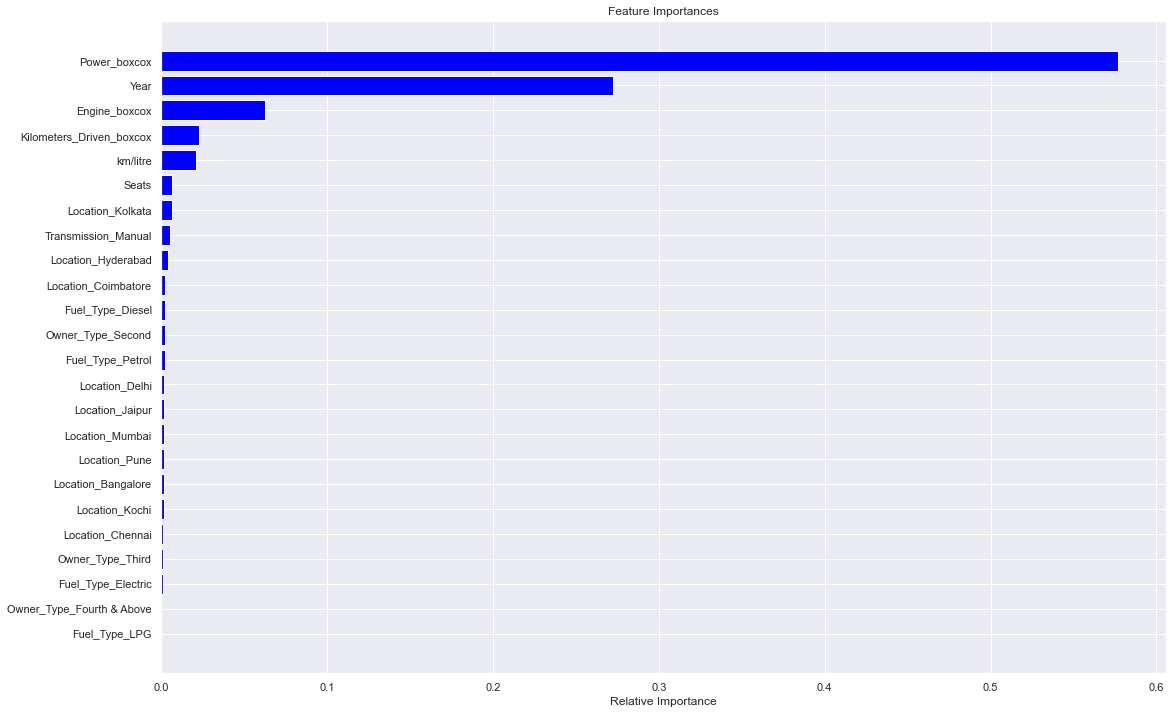

In [113]:
# We'll plot the important features
features = list(x.columns)
important_features = rf_regressor.feature_importances_
indices = np.argsort(important_features)

plt.figure(figsize=(18,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), important_features[indices], color = 'blue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

It was surprising to me to see Power as the most important feature.  But it is by a long shot.  Year comes up second most important, which makes a lot of sense.  Older cars cost less, newer cars cost more.  Kilometers driven and km/litre are also important factors.  However this model does assign some weight to quite a few features, more or less ignoring only 3 of them.

Here is an input to get a prediction out of this regressor (new data would need to be transformed like we tranformed the original csv before plugging it into our model):

In [114]:
# Function to split out a prediction on new data
def prediction(data):
    '''
    Takes a dataframe as input and outputs a prediction(s).  The dataframe should contain the following information:
    Location, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, km/litre, Engine, Power, and Seats
    
    
    Args:
    data - pd.DataFrame
    '''
 
    prediction = rf_regressor.predict(data)
    transformed_prediction = inv_boxcox(prediction, price_lmbda)
    
    total_price = []
    for x in transformed_prediction:
        total_price.append(x * 100000)
    formatted_price = [float('{:.2f}'.format(elem)) for elem in total_price]
    
    return formatted_price

In [115]:
# Try out the function
prediction(rf_x_test.sample(1))[0]

356160.7

Next step will be to provide a summary and recommendations.  The Slides presentation will cover this angle.